# Submission information

In future labs (which will be graded), you will be asked to submit the notebook file in Canvas. When you do, please fill in your group number and names in the table below.

|  Information  |  Your reply  |
|-----------|:---------------------------------|
| **Group** | BML 36 |
| **Name 1** | Thibault Douzon |
| **Name 2** | Raja ? |


# Introduction

The labs for Basic Machine Learning are in Python 3.5, a powerful interpreted language. Python is being increasingly used in machine learning research, as it is fast, portable, has a clean syntax and sports a large collection of scientific software libraries. In this lab, you get an opportunity to familiarise yourself with the software and with the way the labs are set up. This first lab is not graded, but don't hesitate to ask for feedback or help if you get stuck.

In order to deal with the more advanced mathematics that we deal with in this course, we make use of a few python libraries:

* numpy, which allows us to work with vectors and matrices
* scipy, which gives us access to scientific algorithms
* matplotlib, which allows us to plot our results

Notice that when applying machine learning to practical problems, you will probably want to use more high-level libraries such as scikit learn and tensorflow. However, as the purpose of this course is to familiarise you with what's happening behind the scenes, here we focus more on implementing and modifying algorithms, rather than applying canned versions of the same.

For this introduction, we will run our practical exercises within a "*notebook*": an interactive web page that integrates both code and text, allowing us to combine the code with documentation. In this case, you will edit this notebook to write your code and provide answers to the questions. Much of the documentation for python and its libraries can be found online. In particular, you should be able to do the exercises described in this document with the information available at http://scipy.org/docs.html

Before we start, let's load the libraries that we will need for this exercise.

In [1]:
# The following line makes sure that when we plot stuff it shows up in the notebook
# comment it out for the plots to show in a different window.
%matplotlib inline 

#import scipy.io as sio          # Allow for the import of Matlab files
import scipy.stats as stats     # Statistics module
import numpy as np              # Module for, among others, matrix operations
import matplotlib.pyplot as plt # Plotting
       
data = np.load("data.npz")
v = data['v']

# 1.
order_v = v.shape
print(order_v)
# 2.
norm_v = np.sqrt((v * v).sum())
print(norm_v)

# 3.
%time v.T.dot(v)

# 4.
for thresh in range(1, 6):
    print(sum([1 if i > thresh else 0 for i in v]))

(200000, 1)
446.56104741156673
Wall time: 4.09 ms
31834
4472
262
9
0


# Basic stuff

Let's start by playing around a little with some data. Start by loading the variables saved in the file "*data.npz*". This can be done using the "**numpy.load**" command. This file contains multible variables, which can be accessed as elements of a dictionary structure. In the following, we will refer to these variables by their key in the file, so for example, $v$ refers to the vector that you can access as *data['v']* if you called your dictionary "data".

Answer the following questions:

1. What is the order of $v$?
1. Compute the 2-norm $|v|^2$ of $v$. Notice that v is relatively large, which can lead to out-of-memory errors if you're not careful. Check out the *numpy.matrix.dot()* function.
1. use *%timeit* to check how long the computation takes, and report the results
1. How many elements of v are larger than 1? How many are larger than $2, 3,\dots,5$?

## Important remark about grading

In future, graded, notebooks, you will be asked to answer questions by writing text or code within notebooks. When we grade these, we go through all notebooks question by question, to ensure that the grading happens fairly and evenly throughout. To do this, we run your notebook and have scripts that extract the bits corresponding to a particular answer from all the submitted notebooks, using markers to identify the questions. To ensure that the scripts don't miss parts of your answer, please don't modify the cells containing the instructions and explanation, and put your complete answers between the markers. Your answer may span multiple cells.

For example, a question might look like this:

**Question 1 [5 marks]** What is the square root of two?


In [11]:
#Q2_START
print(2**0.5)
#Q2_END

1.4142135623730951


In the above example, you would not modify the cell containing the question, but your answer could consist of multiple parts, as in the example below where the answer spans two code and one markdown cell.



$[\dots]$

**Question 1 [5 marks]**

What is the square root of two?

In [12]:
#Q2_START

s=np.sqrt(2.)
print("The square root of 2 is:",s)

The square root of 2 is: 1.4142135623730951


The square root is computed using the numpy library in this case. Using numpy rather than the Math library for such trivial things is useful, because it allows us to deal with infinity in a principled manner. For example:

In [35]:

with np.errstate(divide='ignore'):
    print("The natural logarithm of zero is:", np.log(0))
    print("... and the exponent of that logarithm is:", np.exp(np.log(0)))

import math

print("Now, using the math library, ... ", end="")
try:
    print("this gives an exception:", math.log(0))
except:
    print("well, that didn't work.")

#Q2_END

The natural logarithm of zero is: -inf
... and the exponent of that logarithm is: 0.0
Now, using the math library, ... well, that didn't work.


## Playing with data

Have a look at the code below and try to make sure you understand it.

In [18]:
d = np.load("data.npz")

v = d['v']

print("The order of V", v.shape)
print("The two-norm of v", np.sqrt(v.T.dot(v)))
print("Timing inner product")
%time v.T.dot(v)

%time for t in [1,2,3,4,5]: print("Number of elements >",t,":",len([x for x in v if x>t]))




The order of V (200000, 1)
The two-norm of v [[446.56104741]]
Timing inner product
Wall time: 0 ns
Number of elements > 1 : 31834
Number of elements > 2 : 4472
Number of elements > 3 : 262
Number of elements > 4 : 9
Number of elements > 5 : 0
Wall time: 2.07 s


## Plotting

Now its your turn. Plot, in the range $[-5\dots 5]$, the Gaussiab PDFs with parameters $(\mu=0,\sigma=1), (\mu=0, \sigma=2), (\mu=0, \sigma=3)$. Use the functions *plt.plot*, *stats.norm.pdf* and *plt.legend*


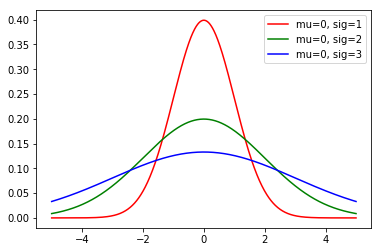

In [2]:
N = 10**3
x = np.linspace(-5, 5, N)
params = [(0,1,'r'), (0,2,'g'), (0,3,'b')]
for (mu, sig, c) in params:
    plt.plot(x, stats.norm.pdf(x=x, loc=mu, scale=sig), c)
plt.legend(["mu={mu}, sig={sig}".format(**{"mu":mu, "sig":sig}) for (mu, sig, _) in params])
plt.show()

## Playing with matrices and Python

Plot a normalised histogram of the elements in vector v2 using 20 bins, and superimpose a plot, in the range $[−5, \dots , 5]$ of the Gaussian distribution with the mean and variance of the data. Use the built-in functions to compute these. In particular, use **np.mean** and **np.cov** to fit the parameters to the data.

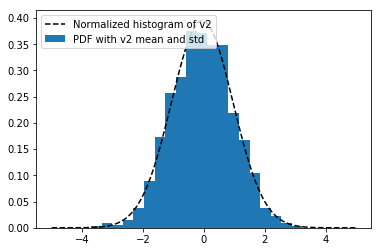

In [3]:

v2 = data["v2"]
N = 10**3
x = np.linspace(-5, 5, N)
plt.hist(v2, bins=20, density=True)

v2_mu = v2.mean()
v2_sig = v2.std()

plt.plot(x, stats.norm.pdf(x, loc=v2_mu, scale=v2_sig), '--k')

plt.legend(['Normalized histogram of v2', 'PDF with v2 mean and std'], loc=2)
plt.show()

Get information on the *np.cov* function using the **help** function. As we will see later, this function does not provide you with the maximum likelihood estimator (MLE) of the parameters. For the Gaussian function, the MLE are 

$$\boldsymbol{\mu} = \frac{\sum_{n=1}^N \mathbf{x}_n}{N}$$ 

and

$$\boldsymbol{\Sigma} = \frac{\sum_{n=1}^N (\mathbf{x}_n-\boldsymbol{\mu})^2}{N}$$

Compute these parameters by hand and compare the values you obtain to those returned by the built-in function. How does your implementation compare in terms of execution speed?
    

In [4]:
v2_mean = sum(v2)/len(v2)
v2_std = (sum(v2**2)/len(v2) - v2_mean**2)**0.5
print('MEAN: %f, STD: %f' % (v2_mean, v2_std))
print('NP MEAN: %f, NP STD: %f' % (v2_mu, v2_sig))
print('Difference: MEAN: %f, STD: %s' % (abs(v2_mean-v2_mu), abs(v2_std-v2_sig)))

print('MEAN time difference:')
print('NP: ', end='')
%time v2.mean()
print('PYTHON: ', end='')
%time sum(v2)/len(v2)
print('NP: ', end='')
%time v2.std()
print('PYTHON HAND FORMULA: ', end='')
%time (sum(v2**2)/len(v2) - v2_mean**2)**0.5
print('PYTHON EXERCISE FORMULA: ', end='')
%time (sum([(x-v2_mu)**2 for x in v2])/len(v2))**0.5


MEAN: -0.053121, STD: 1.010342
NP MEAN: -0.053121, NP STD: 1.010342
Difference: MEAN: 0.000000, STD: [4.4408921e-16]
MEAN time difference:
NP: Wall time: 0 ns
PYTHON: Wall time: 1.53 ms
NP: Wall time: 0 ns
PYTHON HAND FORMULA: Wall time: 668 µs
PYTHON EXERCISE FORMULA: Wall time: 7.04 ms


array([1.01034233])

# More advanced things...

Load the dataset in **data-2class.npz**. This file contains a set of 2-dimensional points $d$, and a corresponding set of labels $l$

1. Create a 2D scatterplot of $d$, using red for the elements with corresponding label 0, and blue for $l_i=1$
1. Draw a straight line separating the two classes
1. Fit two 2D Gaussian distributions, to the points with label $l_i=0$ and $l_i=1$. 
1. Create a heatmap of these distributions, and overlay a scatterplot of the data. 



C:\Anaconda3\envs\BML_LAB\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.1472147354538792


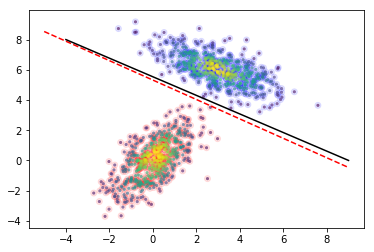

In [8]:
d = np.load("data-2class.npz")
p = d['d'] # points
l = d['l'] # labels
# 1.
plt.scatter(p.T[0], p.T[1], c=['r' if c==0 else 'b' for c in l], alpha=0.1)

# 2.
# --- Using SVM to draw the boundaries ---
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(p, l)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 9)
yy = a * xx - (clf.intercept_[0]) / w[1]

plt.plot(xx, yy, '--r')
# --- END SVM ---

# My intuitions says:
plt.plot([-4, 9], [8, 0], 'k')

gaussians = []
# 3.

for label in [0, 1]:
    # Get the point that satifies the right label
    points = np.array([x for x, la in zip(p, l) if la==label]).T

    mean_point = np.array([np.mean(points[0]), np.mean(points[1])])
    cov_point = np.cov(points)
    
    # Here we store the formula for next time of the distribution function
    # This formula is taken from https://en.wikipedia.org/wiki/Multivariate_normal_distribution / Properties function 
    gaussians.append(lambda x, mean_point=mean_point, cov_point=cov_point: np.exp(-0.5 * (x-mean_point).T @ np.linalg.inv(cov_point) @ (x-mean_point)) / np.sqrt(4*(np.pi)**2*np.linalg.det(cov_point)))

# Here is how to use it
print(gaussians[0](np.array([0,0])))

# 4.
for label in [0, 1]:
    # Get the point that satifies the right label
    points = np.array([x for x, la in zip(p, l) if la==label]).T
    
    # inspired from here: https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib/20107592#20107592
    # Gaussian fit from scipy
    z = stats.gaussian_kde(points)(points)
    idx = z.argsort()
    x, y, z = points[0][idx], points[1][idx], z[idx]
    
    # plot the scatter
    plt.scatter(x, y, c=z, edgecolor='', s=10, alpha=0.6)
    
plt.show()